<a href="https://colab.research.google.com/github/eliasfrivas/DataScience-III/blob/main/Proyecto_Final_DSIII_RivasElias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 **Proyecto Final: CODER HOUSE - DATA SCIENCE III**

##**Analisis de Sentimientos sobre reseñas de Amazon Fine Food** 🍲

**Autor:** Elias Rivas

**Curso:** NLP & Deep Learning aplicado a Ciencia de Datos

**Comisión:** 67490

**Date:** Ocubre 2025

-----------------------------------------------------------------------------

# **Descripción del problema de negocio** 👥🏢

Queremos investigar las reseñas de comida de Amazon para poder obtener patrones de relacion entre lo que escribe el Usuario y el Score de la reseña, esta descripcion mas detallada de los datos nos permitiran entender mejor a los Usuarios para poder cumplir o resolver con las expectativas sobre su experiencia con los Productos consumidos

Obtener un mejor entendimiento del feedback de los usuarios ayuda a enfocarse en lo que realmente valora como cliente y que oportunidades de mejora podemos implementar en el negocio escuchando y analisizando con mayor atencion cada comentario

# **Objetivo general** 🎯

Nuetro objetivo sera analizar las reseñas extrayendo las palabras importantes dentro, para ello aplicaremos tecnicas de:
* Limpieza de datos
* Eliminar simbolos y signos de puntuacion
* Eliminar los stopwords segun el idioma de las reseñas

Tambien analizaremos la frecuencia de las palabras aplicando las diferentes tecnicas como lo son:
*   Tokenizacion
*   Lematizacion
*   Nube de palabras
*   N-Gramas

# Importar Librerias 📚

Vamos a importar las librerias necesarias para la manipulacion y analisis de datos, visualizacion, procesamiento de texto con NLTK y Machine Learning clásico

In [449]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento de texto con NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter # Importamos Counter
from sklearn.feature_extraction.text import TfidfVectorizer # Importa herramientas para convertir texto en números (conteo y TF-IDF).

# Machine Learning clásico
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split     # Importa función para dividir datos en entrenamiento y prueba.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression    # Importa el modelo de regresión logística para clasificación.
from sklearn.metrics import accuracy_score              # Importa métrica para evaluar la precisión del modelo.
from sklearn.feature_extraction.text import CountVectorizer

# Otras
import os
import re

nltk.download('punkt')  # Descargamos el paquete de tokenización de NLTK
nltk.download('punkt_tab')  # Descargamos el paquete de tokenización de NLTK
nltk.download('stopwords') # Descargamos el paquete de stopwords
nltk.download('wordnet')  # Base de datos léxica de WordNet para lematización en inglés

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Origen de los Datos 📑

El dataset que voy a utilizar lo consegui en kaggle [https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews/data](https://)
Este Dataset original cuenta con mas de 500.000 reseñas pero al realizar las primeras pruebas de analisis experimentaba mucha demora y necesidad de extra memoria RAM, por esto lo reduci al 10% ya que luego de haber aplicado todo la programacion las conslusiones finales tienen la misma tendencia

# Lectura de DataSet y limpieza de datos nulos 📕

In [450]:
# Lectura del dataset a implementar en el analisis de Sentimiento
review_data = pd.read_csv('/content/drive/MyDrive/Data Science III/Reviews.csv')

print("(Filas, Columnas)\n", review_data.shape)
review_data.head(10) # Visualizamos las primeras 10 lineas

(Filas, Columnas)
 (51914, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,"2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,""Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as """"Jumbo"""".""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"3,B000LQOCH0,ABXLMWJIXXAIN,""Natalia Corres """"Natalia Corres"""""",1,1,4,1219017600,""""""Delight"""" says it all"",""This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' """"The Lion, The Witch, and The Wardrobe"""" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,"5,B006K2ZZ7K,A1UQRSCLF8GW1T,""Michael D. Bigham """"M. Wassir"""""",0,0,5,1350777600,Great taffy,""Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,""I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,""This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, Fralinger's. Would highly recommend this candy! I served it at a beach-themed party and everyone loved it!""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,""Wonderful, tasty taffy"",This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1.0,1.0,5.0,1.322006e+09,Yay Barley,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0.0,0.0,5.0,1.351210e+09,Healthy Dog Food,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.


In [451]:
# Verificamos la informacion de los datos, cantidad y Dtype
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51914 entries, 0 to 51913
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      51914 non-null  object 
 1   ProductId               9975 non-null   object 
 2   UserId                  9975 non-null   object 
 3   ProfileName             9971 non-null   object 
 4   HelpfulnessNumerator    9916 non-null   float64
 5   HelpfulnessDenominator  9916 non-null   float64
 6   Score                   9916 non-null   float64
 7   Time                    9916 non-null   float64
 8   Summary                 9916 non-null   object 
 9   Text                    9806 non-null   object 
dtypes: float64(4), object(6)
memory usage: 4.0+ MB


In [452]:
# Limpiamos los datos null
review_data.isnull().sum()
review_data.dropna(inplace=True)
review_data.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


In [453]:
# Algunas metricas de calculos
review_data.describe().T

,count,mean,std,min,25%,50%,75%,max
HelpfulnessNumerator,9802.0,9.520506e-01,2.800503e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.150000e+02
HelpfulnessDenominator,9802.0,1.337992e+00,3.468476e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.170000e+02
Score,9802.0,4.298511e+00,1.295080e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,9802.0,1.302021e+09,4.512116e+07,961718400.0,1.283472e+09,1.316218e+09,1.335053e+09,1.351210e+09


In [454]:
# Voy a reducir el dataset y quedarme con una copia de las columnas mas relevantes para el analisis
df_review = review_data[["Id","Text","Score"]]
df_review.head()

,Id,Text,Score
0,1,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,5.0
3,4,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,2.0
8,9,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,5.0
9,10,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.,5.0
16,17,I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like to transfer them to a zip lock baggie so they stay fresh so I can take my time eating them.,2.0


# Normalizacion y Visualizacion de Datos 💽

In [455]:
# Voy a convertir los datos de la columna "Text" en minusculas y agregar esa nueva columna al dataset como "Text_lower", esto me ayudara a mejorar la coincidencia de palabras
# frecuentes sin importar las Mayusculas o Minusculas

df_review['Text_lower'] = df_review['Text'].apply(lambda text: text.lower())
df_review.head()

/tmp/ipython-input-3240625069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['Text_lower'] = df_review['Text'].apply(lambda text: text.lower())


,Id,Text,Score,Text_lower
0,1,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,5.0,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than most.
3,4,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,2.0,if you are looking for the secret ingredient in robitussin i believe i have found it. i got this in addition to the root beer extract i ordered (which was good) and made some cherry soda. the flavor is very medicinal.
8,9,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,5.0,right now i'm mostly just sprouting this so my cats can eat the grass. they love it. i rotate it around with wheatgrass and rye too
9,10,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.,5.0,this is a very healthy dog food. good for their digestion. also good for small puppies. my dog eats her required amount at every feeding.
16,17,I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like to transfer them to a zip lock baggie so they stay fresh so I can take my time eating them.,2.0,i love eating them and they are good for watching tv and looking at movies! it is not too sweet. i like to transfer them to a zip lock baggie so they stay fresh so i can take my time eating them.


In [456]:
# Ahora voy a quitar los signos de puntuacion definiendo una función usando re

def remove_punctuation(text):
    # Expresión regular para reemplazar cualquier signo de puntuación o símbolo no alfanumérico
     return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Aplicar la función a la columna 'Text_lower' y agregamos una nueva columna con la funcion aplicada, se llamara "Text_puntuacion"
df_review['Text_puntuacion'] = df_review['Text_lower'].apply(remove_punctuation)
df_review.head()

/tmp/ipython-input-1763466373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['Text_puntuacion'] = df_review['Text_lower'].apply(remove_punctuation)


,Id,Text,Score,Text_lower,Text_puntuacion
0,1,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,5.0,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than most.,i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most
3,4,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,2.0,if you are looking for the secret ingredient in robitussin i believe i have found it. i got this in addition to the root beer extract i ordered (which was good) and made some cherry soda. the flavor is very medicinal.,if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered which was good and made some cherry soda the flavor is very medicinal
8,9,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,5.0,right now i'm mostly just sprouting this so my cats can eat the grass. they love it. i rotate it around with wheatgrass and rye too,right now im mostly just sprouting this so my cats can eat the grass they love it i rotate it around with wheatgrass and rye too
9,10,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.,5.0,this is a very healthy dog food. good for their digestion. also good for small puppies. my dog eats her required amount at every feeding.,this is a very healthy dog food good for their digestion also good for small puppies my dog eats her required amount at every feeding
16,17,I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like to transfer them to a zip lock baggie so they stay fresh so I can take my time eating them.,2.0,i love eating them and they are good for watching tv and looking at movies! it is not too sweet. i like to transfer them to a zip lock baggie so they stay fresh so i can take my time eating them.,i love eating them and they are good for watching tv and looking at movies it is not too sweet i like to transfer them to a zip lock baggie so they stay fresh so i can take my time eating them


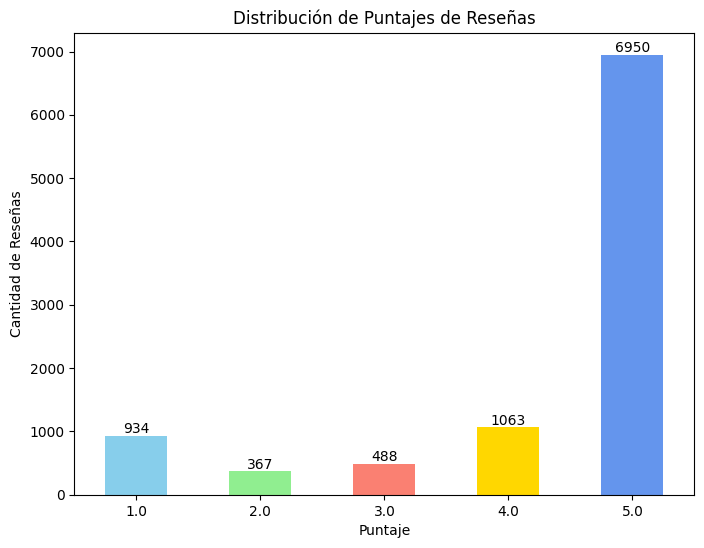

In [457]:
# Voy a visualizar los datos de la Columna "Score" como es una variable numerica podemos hacer un grafico de barras para ver como se distribuye en Score
plt.figure(figsize=(8, 6))
ax = df_review['Score'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'gold', 'cornflowerblue'])

plt.title('Distribución de Puntajes de Reseñas')
plt.xlabel('Puntaje')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=0)

# Etiquetas de datos
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Tokenizacion 💌

## Definición:
La tokenización consiste en dividir un texto en unidades pequeñas llamadas tokens, que generalmente son palabras, aunque también pueden ser frases, oraciones o caracteres, dependiendo del contexto.


In [458]:
# Tokenizamos los valores de la columna 'Text_puntuacion' de manera que vamos a poder identificar cada palabra de la reseña
df_review['Text_tokenizado'] = df_review['Text_puntuacion'].apply(word_tokenize)

/tmp/ipython-input-4245100672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['Text_tokenizado'] = df_review['Text_puntuacion'].apply(word_tokenize)


In [459]:
# Configuramos pandas para mostrar el contenido completo de las columnas
pd.set_option('display.max_colwidth', None)


In [460]:
# Mostramos las primeras filas con la columna original y de la columna tokenizada
df_review[['Text', 'Text_tokenizado']].head()

,Text,Text_tokenizado
0,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,"[i, have, bought, several, of, the, vitality, canned, dog, food, products, and, have, found, them, all, to, be, of, good, quality, the, product, looks, more, like, a, stew, than, a, processed, meat, and, it, smells, better, my, labrador, is, finicky, and, she, appreciates, this, product, better, than, most]"
3,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,"[if, you, are, looking, for, the, secret, ingredient, in, robitussin, i, believe, i, have, found, it, i, got, this, in, addition, to, the, root, beer, extract, i, ordered, which, was, good, and, made, some, cherry, soda, the, flavor, is, very, medicinal]"
8,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,"[right, now, im, mostly, just, sprouting, this, so, my, cats, can, eat, the, grass, they, love, it, i, rotate, it, around, with, wheatgrass, and, rye, too]"
9,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.,"[this, is, a, very, healthy, dog, food, good, for, their, digestion, also, good, for, small, puppies, my, dog, eats, her, required, amount, at, every, feeding]"
16,I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like to transfer them to a zip lock baggie so they stay fresh so I can take my time eating them.,"[i, love, eating, them, and, they, are, good, for, watching, tv, and, looking, at, movies, it, is, not, too, sweet, i, like, to, transfer, them, to, a, zip, lock, baggie, so, they, stay, fresh, so, i, can, take, my, time, eating, them]"


In [461]:
# Restauramos la configuración predeterminada de pandas para el ancho de las columnas
pd.reset_option('display.max_colwidth')

# Remover Stopwords ❌
## Definición:
El proceso de remover stopwords consiste en eliminar las palabras vacías que no aportan un valor significativo al análisis del texto. Estas palabras incluyen artículos, preposiciones, conjunciones y otros términos comunes que suelen ser irrelevantes para tareas de procesamiento de texto.

In [462]:
# Obtenemos el listado de stopwords en ingles, previamente hemos descargado el paquete de stopwords 'nltk.download('stopwords')'

# Lista de stopwords en inglés
stop_words = set(stopwords.words('english')) # Creamos un conjunto de stopwords en inglés usando NLTK

# Mostramos las primeras 20
print("Lista de los primeros 20 stopwords en inglres:\n")
print("**************************************************************************************************************************************************************************************")
print("*",list(stop_words)[:20],"*")
print("**************************************************************************************************************************************************************************************\n")
# Función para eliminar stopwords de los tokens
# Aplicamos una función lambda a cada fila de la columna 'Text_tokenizado'
df_review['Text_tokenizado_sin_stopwords'] = df_review['Text_tokenizado'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
    # La función lambda toma cada lista de tokens (palabras tokenizadas de la reseña),
    # y devuelve una nueva lista donde no estan las palabras encontradas dentro de los stopwords

Lista de los primeros 20 stopwords en inglres:

**************************************************************************************************************************************************************************************
* ['and', 'by', 'needn', 'most', "weren't", 'hadn', 'me', 'against', 've', 'while', 'no', 't', 'then', 'where', "you've", 'she', 'mustn', 'some', 'during', "you're"] *
**************************************************************************************************************************************************************************************



/tmp/ipython-input-3753966433.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['Text_tokenizado_sin_stopwords'] = df_review['Text_tokenizado'].apply(lambda tokens: [word for word in tokens if word not in stop_words])


In [463]:
pd.set_option('display.max_colwidth', None)

print("Visualizamos las columnas del texto tokenizado y despues de haber quitado los stopwords:")
df_review[["Text_tokenizado","Text_tokenizado_sin_stopwords"]]

Visualizamos las columnas del texto tokenizado y despues de haber quitado los stopwords:


,Text_tokenizado,Text_tokenizado_sin_stopwords
0,"[i, have, bought, several, of, the, vitality, canned, dog, food, products, and, have, found, them, all, to, be, of, good, quality, the, product, looks, more, like, a, stew, than, a, processed, meat, and, it, smells, better, my, labrador, is, finicky, and, she, appreciates, this, product, better, than, most]","[bought, several, vitality, canned, dog, food, products, found, good, quality, product, looks, like, stew, processed, meat, smells, better, labrador, finicky, appreciates, product, better]"
3,"[if, you, are, looking, for, the, secret, ingredient, in, robitussin, i, believe, i, have, found, it, i, got, this, in, addition, to, the, root, beer, extract, i, ordered, which, was, good, and, made, some, cherry, soda, the, flavor, is, very, medicinal]","[looking, secret, ingredient, robitussin, believe, found, got, addition, root, beer, extract, ordered, good, made, cherry, soda, flavor, medicinal]"
8,"[right, now, im, mostly, just, sprouting, this, so, my, cats, can, eat, the, grass, they, love, it, i, rotate, it, around, with, wheatgrass, and, rye, too]","[right, im, mostly, sprouting, cats, eat, grass, love, rotate, around, wheatgrass, rye]"
9,"[this, is, a, very, healthy, dog, food, good, for, their, digestion, also, good, for, small, puppies, my, dog, eats, her, required, amount, at, every, feeding]","[healthy, dog, food, good, digestion, also, good, small, puppies, dog, eats, required, amount, every, feeding]"
16,"[i, love, eating, them, and, they, are, good, for, watching, tv, and, looking, at, movies, it, is, not, too, sweet, i, like, to, transfer, them, to, a, zip, lock, baggie, so, they, stay, fresh, so, i, can, take, my, time, eating, them]","[love, eating, good, watching, tv, looking, movies, sweet, like, transfer, zip, lock, baggie, stay, fresh, take, time, eating]"
...,...,...
51891,"[i, rated, this, product, 3, stars, because, the, color, was, yellow, that, let, me, know, it, had, been, on, the, shelf, for, a, while, even, with, the, yellow, color, the, favor, was, good, but, not, as, strong, as, i, would, have, liked, it, to, be, i, have, order, directly, from, watkins, aand, the, color, was, clear, and, the, favor, stronger, might, order, from, watkins, the, next, time]","[rated, product, 3, stars, color, yellow, let, know, shelf, even, yellow, color, favor, good, strong, would, liked, order, directly, watkins, aand, color, clear, favor, stronger, might, order, watkins, next, time]"
51896,"[it, was, a, great, deal, to, buy, a, box, 12, of, these, to, distribute, to, colleagues, at, work, easy, and, muchappreciated, holiday, gift]","[great, deal, buy, box, 12, distribute, colleagues, work, easy, muchappreciated, holiday, gift]"
51909,"[i, love, this, product, i, got, so, much, more, than, i, thought, i, was, getting, it, was, a, wonderful, batch, if, dried, lavender, and, i, plan, on, buying, more, from, this, seller, soon]","[love, product, got, much, thought, getting, wonderful, batch, dried, lavender, plan, buying, seller, soon]"
51912,"[i, purchased, this, lavender, to, make, lavender, lemonade, for, a, bridal, shower, and, it, went, over, very, well, cooking, the, lavender, made, our, whole, house, smell, like, a, spa, and, it, tasted, fantastic, it, shipped, in, a, timely, mannor, and, came, in, a, large, rectangle, ziplock, baggie, with, a, little, labie, i, wouldnt, hesitate, to, purchase, it, again]","[purchased, lavender, make, lavender, lemonade, bridal, shower, went, well, cooking, lavender, made, whole, house, smell, like, spa, tasted, fantastic, shipped, timely, mannor, came, large, rectangle, ziplock, baggie, little, labie, wouldnt, hesitate, purchase]"


# Lematización 🆎
## Definición:
La lematización es el proceso de reducir una palabra a su lema, que es su forma canónica o base, teniendo en cuenta su contexto gramatical (por ejemplo, el verbo "corriendo" se lematiza a "correr"). A diferencia del stemming, la lematización no simplemente corta los sufijos, sino que trata de identificar la forma correcta de la palabra.

In [464]:
# Iniciamos el lematizador
lemmatizer = WordNetLemmatizer()

# Aplicamos la lematización a la columna 'Text_tokenizado_sin_stopword'
df_review['Text_lematizacion'] = df_review['Text_tokenizado_sin_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

/tmp/ipython-input-3186193013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['Text_lematizacion'] = df_review['Text_tokenizado_sin_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])


In [465]:
# Previsualizamos las 5 versiones de la columna Text habiendo aplicado tecnicas de manipulacion de Texto
print("Tecnicas de manipulacion de Texto aplicadas:")
print("Aplicamos Texto a minusculas: Text -> Text_lower")
print("Aplicamos Eliminiar signos y simbolos de puntuacion: Text_lower -> Text_puntuacion")
print("Aplicamos Tokenizacion del Texto: Text_puntuacion -> Text_tokenizado")
print("Aplicamos Eliminar los stopwords: Text_tokenizado -> Text_tokenizado_sin_stopwords\n")
print("Aplicamos Lematizacion: Text_tokenizado_ -> Text_tokenizado_sin_stopwords\n")
df_review.head()

Tecnicas de manipulacion de Texto aplicadas:
Aplicamos Texto a minusculas: Text -> Text_lower
Aplicamos Eliminiar signos y simbolos de puntuacion: Text_lower -> Text_puntuacion
Aplicamos Tokenizacion del Texto: Text_puntuacion -> Text_tokenizado
Aplicamos Eliminar los stopwords: Text_tokenizado -> Text_tokenizado_sin_stopwords

Aplicamos Lematizacion: Text_tokenizado_ -> Text_tokenizado_sin_stopwords



,Id,Text,Score,Text_lower,Text_puntuacion,Text_tokenizado,Text_tokenizado_sin_stopwords,Text_lematizacion
0,1,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,5.0,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than most.,i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most,"[i, have, bought, several, of, the, vitality, canned, dog, food, products, and, have, found, them, all, to, be, of, good, quality, the, product, looks, more, like, a, stew, than, a, processed, meat, and, it, smells, better, my, labrador, is, finicky, and, she, appreciates, this, product, better, than, most]","[bought, several, vitality, canned, dog, food, products, found, good, quality, product, looks, like, stew, processed, meat, smells, better, labrador, finicky, appreciates, product, better]","[bought, several, vitality, canned, dog, food, product, found, good, quality, product, look, like, stew, processed, meat, smell, better, labrador, finicky, appreciates, product, better]"
3,4,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,2.0,if you are looking for the secret ingredient in robitussin i believe i have found it. i got this in addition to the root beer extract i ordered (which was good) and made some cherry soda. the flavor is very medicinal.,if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered which was good and made some cherry soda the flavor is very medicinal,"[if, you, are, looking, for, the, secret, ingredient, in, robitussin, i, believe, i, have, found, it, i, got, this, in, addition, to, the, root, beer, extract, i, ordered, which, was, good, and, made, some, cherry, soda, the, flavor, is, very, medicinal]","[looking, secret, ingredient, robitussin, believe, found, got, addition, root, beer, extract, ordered, good, made, cherry, soda, flavor, medicinal]","[looking, secret, ingredient, robitussin, believe, found, got, addition, root, beer, extract, ordered, good, made, cherry, soda, flavor, medicinal]"
8,9,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,5.0,right now i'm mostly just sprouting this so my cats can eat the grass. they love it. i rotate it around with wheatgrass and rye too,right now im mostly just sprouting this so my cats can eat the grass they love it i rotate it around with wheatgrass and rye too,"[right, now, im, mostly, just, sprouting, this, so, my, cats, can, eat, the, grass, they, love, it, i, rotate, it, around, with, wheatgrass, and, rye, too]","[right, im, mostly, sprouting, cats, eat, grass, love, rotate, around, wheatgrass, rye]","[right, im, mostly, sprouting, cat, eat, grass, love, rotate, around, wheatgrass, rye]"
9,10,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.,5.0,this is a very healthy dog food. good for their digestion. also good for small puppies. my dog eats her required amount at every feeding.,this is a very healthy dog food good for their digestion also good for small puppies my dog eats her required amount at every feeding,"[this, is, a, very, healthy, dog, food

In [466]:
# Unimos todos los tokens lematizados en una sola lista
tokens_lematizados = [token for tokens_list in df_review['Text_lematizacion'] for token in tokens_list]

# Contamos la frecuencia de cada palabra
frecuencia_palabras_lematizadas = Counter(tokens_lematizados)

# Mostramos las 20 palabras más comunes
frecuencia_palabras_lematizadas.most_common(20)

[('great', 2688),
 ('love', 2620),
 ('like', 2297),
 ('good', 2237),
 ('product', 2188),
 ('taste', 2165),
 ('flavor', 1703),
 ('coffee', 1666),
 ('one', 1604),
 ('tea', 1452),
 ('would', 1220),
 ('dog', 1205),
 ('get', 1144),
 ('best', 1087),
 ('price', 1072),
 ('make', 1038),
 ('time', 1005),
 ('really', 972),
 ('food', 936),
 ('buy', 936)]

In [467]:
# Detecte que una de las palabras con mayor frecuencia no hace referencia a una descripcion sino que es una etiqueta de salto de linea de HTML <br /> por tal motivo vamos a removerla
# Eliminamos 'br' del diccionario de frecuencias, esto sucedio cuando utilice la base completa de los 500.000 registros
if 'br' in frecuencia_palabras_lematizadas:
    del frecuencia_palabras_lematizadas['br']

# Otra forma seria incorporar a la lista stop_words "br"
# stop_words.extend(["br"])

# Mostramos las 20 palabras más comunes después de eliminar 'br'
frecuencia_palabras_lematizadas.most_common(20)

[('great', 2688),
 ('love', 2620),
 ('like', 2297),
 ('good', 2237),
 ('product', 2188),
 ('taste', 2165),
 ('flavor', 1703),
 ('coffee', 1666),
 ('one', 1604),
 ('tea', 1452),
 ('would', 1220),
 ('dog', 1205),
 ('get', 1144),
 ('best', 1087),
 ('price', 1072),
 ('make', 1038),
 ('time', 1005),
 ('really', 972),
 ('food', 936),
 ('buy', 936)]

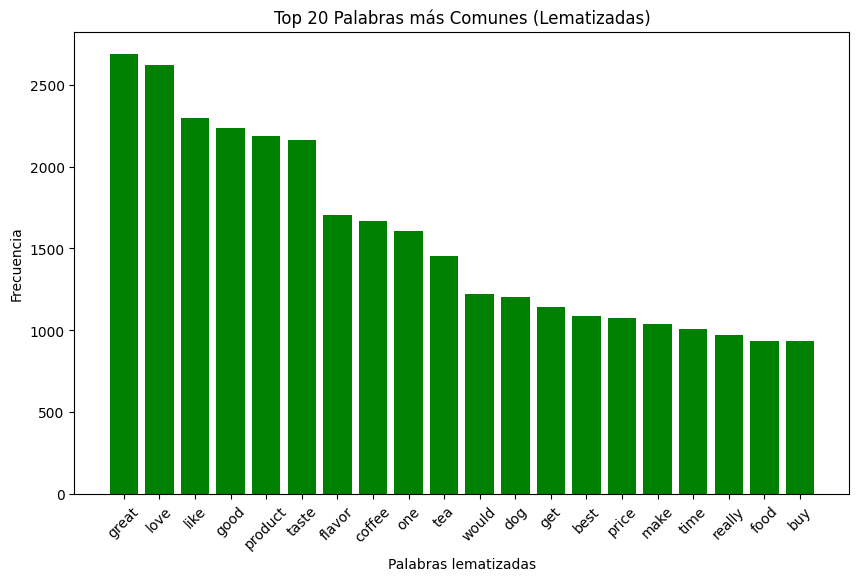

In [468]:
# Obtenemos las 20 palabras más comunes y sus frecuencias
palabras_lem, frecuencias_lem = zip(*frecuencia_palabras_lematizadas.most_common(20))

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustamos el tamaño del gráfico
plt.bar(palabras_lem, frecuencias_lem, color='green')

# Añadimos etiquetas y título
plt.xlabel('Palabras lematizadas')
plt.ylabel('Frecuencia')
plt.title('Top 20 Palabras más Comunes (Lematizadas)')

# Rotamos las etiquetas del eje X para que se lean mejor
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()

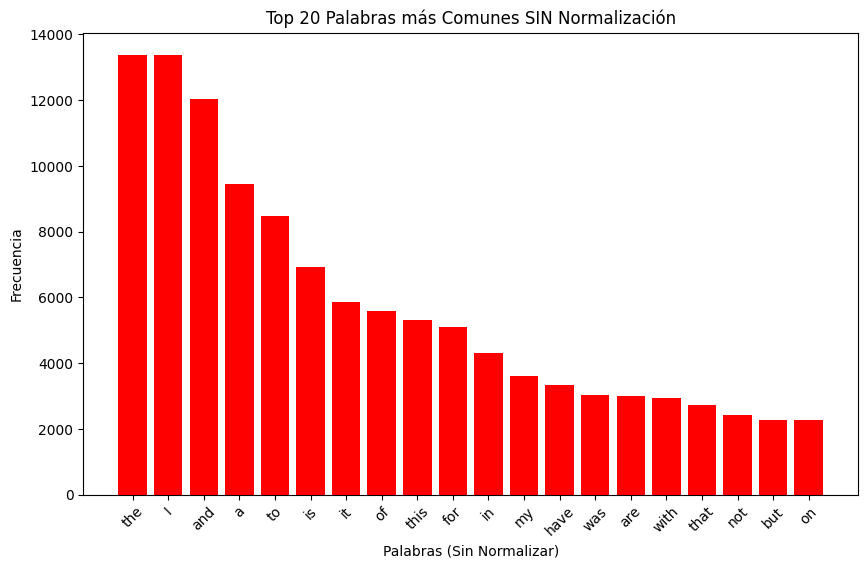

In [469]:
# Tokenizamos sin normalizar (sin pasar a minúsculas, sin quitar puntuación)
tokens_sin_normalizar = [token for review in df_review['Text'] for token in review.split()]

# Contamos la frecuencia de cada palabra
frecuencia_sin_normalizar = Counter(tokens_sin_normalizar)

# Obtenemos las 20 palabras más comunes y sus frecuencias
palabras_sin_norm, frecuencias_sin_norm = zip(*frecuencia_sin_normalizar.most_common(20))

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras_sin_norm, frecuencias_sin_norm, color='red')  # Color rojo para marcar que está "mal"

# Añadimos etiquetas y título
plt.xlabel('Palabras (Sin Normalizar)')
plt.ylabel('Frecuencia')
plt.title('Top 20 Palabras más Comunes SIN Normalización')

# Rotamos las etiquetas del eje X para que se lean mejor
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()

# Nube de Palabras ☁

Una nube de palabras (o WordCloud) es una visualización de datos que representa la frecuencia con la que aparecen las palabras en un texto dado. Cuanto más grande y a menudo más destacada sea una palabra en la nube, mayor es su frecuencia de aparición en el texto analizado.

In [470]:
# Voy a instalatar la libreria
!pip install wordcloud matplotlib

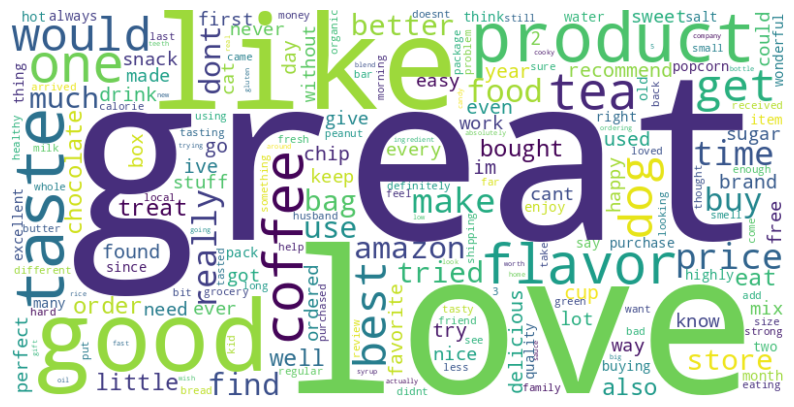

In [471]:
# Accedemos a la libreria para implementar la WordCloud
from wordcloud import WordCloud

# Realizo una nube de palabras con las palabras lematizadas que obtuvimos con mayor frecuencia 'frecuencia_palabras_lematizadas'
wordcloud_lematizadas = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_palabras_lematizadas)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_lematizadas, interpolation='bilinear')
plt.axis('off')
plt.show()

# N-Grams ☕

Los N-gramas son secuencias contiguas de $N$ elementos (generalmente palabras o caracteres) tomados de un texto. Son un concepto fundamental en el Procesamiento del Lenguaje Natural (PLN) y se utilizan para modelar el lenguaje al capturar el contexto local y las dependencias entre los elementos.

In [472]:
# Visualizamos el Dataframe con todas las columnas de Text adicionales, para realizar la vectorizacion N-Grams vamos a utilizar la columna original Text

display(df_review.head())

,Id,Text,Score,Text_lower,Text_puntuacion,Text_tokenizado,Text_tokenizado_sin_stopwords,Text_lematizacion
0,1,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,5.0,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than most.,i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most,"[i, have, bought, several, of, the, vitality, canned, dog, food, products, and, have, found, them, all, to, be, of, good, quality, the, product, looks, more, like, a, stew, than, a, processed, meat, and, it, smells, better, my, labrador, is, finicky, and, she, appreciates, this, product, better, than, most]","[bought, several, vitality, canned, dog, food, products, found, good, quality, product, looks, like, stew, processed, meat, smells, better, labrador, finicky, appreciates, product, better]","[bought, several, vitality, canned, dog, food, product, found, good, quality, product, look, like, stew, processed, meat, smell, better, labrador, finicky, appreciates, product, better]"
3,4,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,2.0,if you are looking for the secret ingredient in robitussin i believe i have found it. i got this in addition to the root beer extract i ordered (which was good) and made some cherry soda. the flavor is very medicinal.,if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered which was good and made some cherry soda the flavor is very medicinal,"[if, you, are, looking, for, the, secret, ingredient, in, robitussin, i, believe, i, have, found, it, i, got, this, in, addition, to, the, root, beer, extract, i, ordered, which, was, good, and, made, some, cherry, soda, the, flavor, is, very, medicinal]","[looking, secret, ingredient, robitussin, believe, found, got, addition, root, beer, extract, ordered, good, made, cherry, soda, flavor, medicinal]","[looking, secret, ingredient, robitussin, believe, found, got, addition, root, beer, extract, ordered, good, made, cherry, soda, flavor, medicinal]"
8,9,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,5.0,right now i'm mostly just sprouting this so my cats can eat the grass. they love it. i rotate it around with wheatgrass and rye too,right now im mostly just sprouting this so my cats can eat the grass they love it i rotate it around with wheatgrass and rye too,"[right, now, im, mostly, just, sprouting, this, so, my, cats, can, eat, the, grass, they, love, it, i, rotate, it, around, with, wheatgrass, and, rye, too]","[right, im, mostly, sprouting, cats, eat, grass, love, rotate, around, wheatgrass, rye]","[right, im, mostly, sprouting, cat, eat, grass, love, rotate, around, wheatgrass, rye]"
9,10,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.,5.0,this is a very healthy dog food. good for their digestion. also good for small puppies. my dog eats her required amount at every feeding.,this is a very healthy dog food good for their digestion also good for small puppies my dog eats her required amount at every feeding,"[this, is, a, very, healthy, dog, food

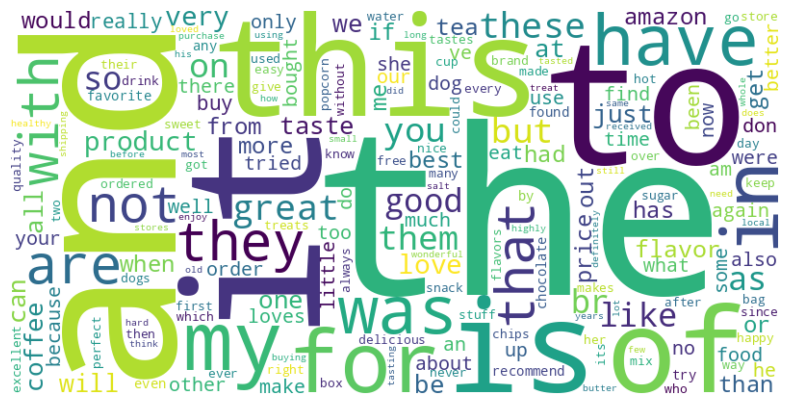

In [473]:
# Crear el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(1,1))

# Transformar el texto de la columna 'Text' en n-gramas
X = vectorizer.fit_transform(df_review['Text'])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))

# Generar la WordCloud desde las frecuencias de los n-gramas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

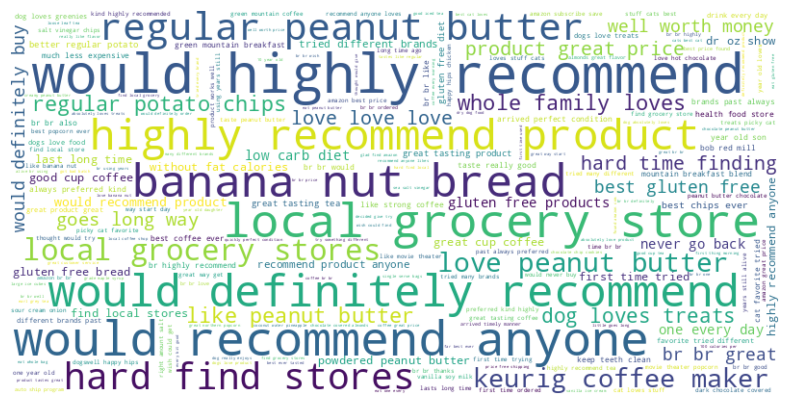

In [474]:
stop_words = list(set(stopwords.words('english')))  # Anteriormente ya habiamos definido esta lista de stopwords en Ingles

# Se crea el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(3,3), stop_words = stop_words)

# Se transforma el texto de la columna 'Text' en n-gramas
X = vectorizer.fit_transform(df_review['Text'])

# Se extrae los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Se crea un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))

# Se generar la WordCloud desde las frecuencias de los n-gramas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)

# Vamos a mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [475]:
# Vamos a incorporar nuevos valores a la lista stop_words >>>> salio de la primer version utilizando el Dataframe original
stop_words.extend(["http","www","br","gp","com","href"])

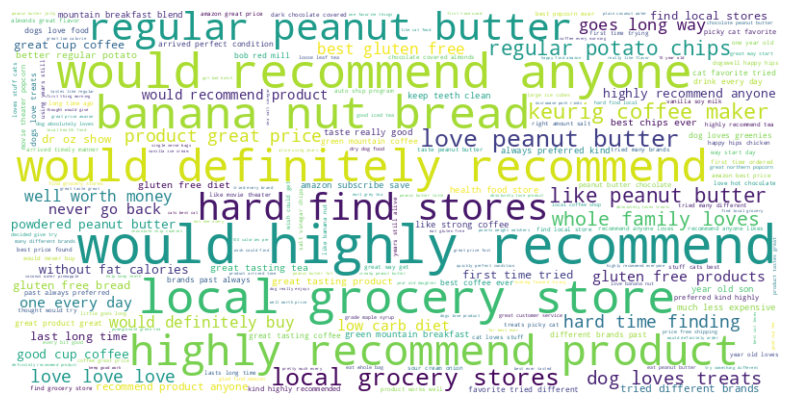

In [476]:
# Se crea el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(3,3), stop_words = stop_words)

# Se transforma el texto de la columna 'Text' en n-gramas
X = vectorizer.fit_transform(df_review['Text'])

# Se extrae los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Se crea un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))

# Se genera la WordCloud desde las frecuencias de los n-gramas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)

# Vamos a mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [477]:
# Convertimos el diccionario en df
df_n_grams_freq = pd.DataFrame(list(n_grams_freq.items()), columns=['Término', 'Frecuencia'])

In [478]:
# Ordenamos el df
dfgrams = df_n_grams_freq.sort_values(by='Frecuencia', ascending=False)

In [479]:
# Visualizamos los primeros 20 ngramas con mayor frecuencia.
dfgrams.head(20)

,Término,Frecuencia
149417,would highly recommend,43
149668,would recommend anyone,35
77308,local grocery store,33
10094,banana nut bread,30
149247,would definitely recommend,29
65861,highly recommend product,26
111377,regular peanut butter,23
64187,hard find stores,21
79660,love peanut butter,20
77309,local grocery stores,20


# TF-IDE & Bag of Words (BOW) 🔍

In [480]:
# Repasamos el dataframe con sus columnas analizadas
df_review.head()

,Id,Text,Score,Text_lower,Text_puntuacion,Text_tokenizado,Text_tokenizado_sin_stopwords,Text_lematizacion
0,1,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,5.0,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than most.,i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most,"[i, have, bought, several, of, the, vitality, canned, dog, food, products, and, have, found, them, all, to, be, of, good, quality, the, product, looks, more, like, a, stew, than, a, processed, meat, and, it, smells, better, my, labrador, is, finicky, and, she, appreciates, this, product, better, than, most]","[bought, several, vitality, canned, dog, food, products, found, good, quality, product, looks, like, stew, processed, meat, smells, better, labrador, finicky, appreciates, product, better]","[bought, several, vitality, canned, dog, food, product, found, good, quality, product, look, like, stew, processed, meat, smell, better, labrador, finicky, appreciates, product, better]"
3,4,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,2.0,if you are looking for the secret ingredient in robitussin i believe i have found it. i got this in addition to the root beer extract i ordered (which was good) and made some cherry soda. the flavor is very medicinal.,if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered which was good and made some cherry soda the flavor is very medicinal,"[if, you, are, looking, for, the, secret, ingredient, in, robitussin, i, believe, i, have, found, it, i, got, this, in, addition, to, the, root, beer, extract, i, ordered, which, was, good, and, made, some, cherry, soda, the, flavor, is, very, medicinal]","[looking, secret, ingredient, robitussin, believe, found, got, addition, root, beer, extract, ordered, good, made, cherry, soda, flavor, medicinal]","[looking, secret, ingredient, robitussin, believe, found, got, addition, root, beer, extract, ordered, good, made, cherry, soda, flavor, medicinal]"
8,9,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,5.0,right now i'm mostly just sprouting this so my cats can eat the grass. they love it. i rotate it around with wheatgrass and rye too,right now im mostly just sprouting this so my cats can eat the grass they love it i rotate it around with wheatgrass and rye too,"[right, now, im, mostly, just, sprouting, this, so, my, cats, can, eat, the, grass, they, love, it, i, rotate, it, around, with, wheatgrass, and, rye, too]","[right, im, mostly, sprouting, cats, eat, grass, love, rotate, around, wheatgrass, rye]","[right, im, mostly, sprouting, cat, eat, grass, love, rotate, around, wheatgrass, rye]"
9,10,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.,5.0,this is a very healthy dog food. good for their digestion. also good for small puppies. my dog eats her required amount at every feeding.,this is a very healthy dog food good for their digestion also good for small puppies my dog eats her required amount at every feeding,"[this, is, a, very, healthy, dog, food

In [481]:
# Redefinimos el dataframe con las primeras tres columnas
df_original = df_review.iloc[:, :3].copy()
print("Nuevo Dataframe con las primeras tres columnas de datos originales:")
display(df_original.head())

Nuevo Dataframe con las primeras tres columnas de datos originales:


,Id,Text,Score
0,1,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,5.0
3,4,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,2.0
8,9,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,5.0
9,10,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.,5.0
16,17,I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like to transfer them to a zip lock baggie so they stay fresh so I can take my time eating them.,2.0


In [482]:
# Obtenemos la cuenta de la columna Score
score_counts = df_original['Score'].value_counts()

# Se muestra la cuenta de los valores en la columna Score
print("Conteo de los valores en la columna 'Score' para cada puntuacion:")
print(score_counts)

Conteo de los valores en la columna 'Score' para cada puntuacion:
Score
5.0    6950
4.0    1063
1.0     934
3.0     488
2.0     367
Name: count, dtype: int64


In [483]:
# Voy a convertir los valores de la columna Score con la siguiente sintaxis
# 4 y 5 en 1 (Positivo)
# 1 y 2 en 0 (Negativo)
# Elimino los 3 (Neutral)

df_original['Score'] = df_original['Score'].apply(lambda score: 1 if score in [4, 5] else (0 if score in [1, 2] else None))

# Se elimina filas con Score nulo (los que eran 3)
df_original.dropna(subset=['Score'], inplace=True)

# Se convierte la columna Score a tipo entero
df_original['Score'] = df_original['Score'].astype(int)

# Se muestra la distribución de los nuevos puntajes
print("Distribución de los puntajes después de la transformación:")
print(df_original['Score'].value_counts())
display(df_original.head())

Distribución de los puntajes después de la transformación:
Score
1    8013
0    1301
Name: count, dtype: int64


,Id,Text,Score
0,1,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,1
3,4,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,0
8,9,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,1
9,10,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.,1
16,17,I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like to transfer them to a zip lock baggie so they stay fresh so I can take my time eating them.,0


**Bag of Words (BoW)**

 Voy a utilizar el modelo BoW que trata a un documento de texto como una colección desordenada de palabras, como si estuvieran dentro de una "bolsa".
 La información más importante es qué palabras aparecen y con qué frecuencia, ignorando completamente el orden y la gramática.

In [484]:
# Separamos características (reseña) y objetivo (clasificacion)
X = df_original['Text']
y = df_original['Score']

In [485]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [486]:
# Inicializar el CountVectorizer (BoW)
vectorizador_bow = CountVectorizer()

# Ajustar y transformar las reseñas de entrenamiento
X_train_bow = vectorizador_bow.fit_transform(X_train)

In [487]:
X_train_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 198795 stored elements and shape (6519, 10056)>

In [488]:
# Transformar las reseñas de prueba
X_test_bow = vectorizador_bow.transform(X_test)

print("Vocabulario BoW:", vectorizador_bow.get_feature_names_out())
print("Matriz BoW de entrenamiento:\n", X_train_bow.toarray())

Vocabulario BoW: ['00' '01' '03' ... 'zukes' 'zuma' 'zyto']
Matriz BoW de entrenamiento:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [489]:
# Entrenar el modelo de Regresión Logística con Bag of Words
modelo_bow = LogisticRegression()
modelo_bow.fit(X_train_bow, y_train)

LogisticRegression()

In [490]:
# Hacer predicciones en el conjunto de prueba
y_pred_bow = modelo_bow.predict(X_test_bow)

In [491]:
# Calcular la precisión del modelo
accuracy_bow = accuracy_score(y_test, y_pred_bow)
print("Precisión usando Bag of Words:", accuracy_bow)

Precisión usando Bag of Words: 0.9262969588550984


**TF-IDF**

Por sus siglas en inglés: Term Frequency-Inverse Document Frequency, o Frecuencia de Término-Frecuencia Inversa de Documento) es una métrica numérica que se usa en el Procesamiento del Lenguaje Natural (PLN) y la Recuperación de Información para reflejar la importancia de una palabra en un documento dentro de una gran colección de documentos (un corpus).

Es una mejora sobre el simple conteo de palabras del modelo Bag of Words, ya que no solo considera la frecuencia, sino también la rareza de la palabra.

In [492]:
# Inicializar el TfidfVectorizer
vectorizador_tfidf = TfidfVectorizer()

# Ajustar y transformar las reseñas de entrenamiento
X_train_tfidf = vectorizador_tfidf.fit_transform(X_train)

# Transformar las reseñas de prueba
X_test_tfidf = vectorizador_tfidf.transform(X_test)

print("Vocabulario TF-IDF:", vectorizador_tfidf.get_feature_names_out())
print("Matriz TF-IDF de entrenamiento:\n", X_train_tfidf.toarray())

Vocabulario TF-IDF: ['00' '01' '03' ... 'zukes' 'zuma' 'zyto']
Matriz TF-IDF de entrenamiento:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [493]:
# Entrenar el modelo de Regresión Logística con TF-IDF
modelo_tfidf = LogisticRegression()
modelo_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [494]:
# Hacer predicciones en el conjunto de prueba
y_pred_tfidf = modelo_tfidf.predict(X_test_tfidf)

# Calcular la precisión del modelo
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Precisión usando TF-IDF:", accuracy_tfidf)

Precisión usando TF-IDF: 0.8991055456171735


In [501]:
# Función para predecir una nueva reseña
def predecir_reseña(nueva_reseña, modelo_bow, modelo_tfidf, vectorizador_bow, vectorizador_tfidf):
    # Preprocesar la nueva reseña
    nueva_reseña_bow = vectorizador_bow.transform([nueva_reseña])
    nueva_reseña_tfidf = vectorizador_tfidf.transform([nueva_reseña])

    # Predicción usando Bag of Words
    prediccion_bow = modelo_bow.predict(nueva_reseña_bow)
    # Predicción usando TF-IDF
    prediccion_tfidf = modelo_tfidf.predict(nueva_reseña_tfidf)

    # Mostrar resultados
    print(f"Reseña ingresada: {nueva_reseña}")
    print(f"Predicción con Bag of Words: {'Positiva' if prediccion_bow[0] == 1 else 'Negativa'}")
    print(f"Predicción con TF-IDF: {'Positiva' if prediccion_tfidf[0] == 1 else 'Negativa'}")


# Simular ingreso de nueva reseña por el usuario
nueva_reseña = input("Ingresa una reseña de Comida: ")
predecir_reseña(nueva_reseña, modelo_bow, modelo_tfidf, vectorizador_bow, vectorizador_tfidf)

Ingresa una reseña de Comida: i dont like fine food, its bad
Reseña ingresada: i dont like fine food, its bad
Predicción con Bag of Words: Positiva
Predicción con TF-IDF: Negativa


# **Conclusion Final** ✅


Este proyecto me inspiro en buscar la aplicación de técnicas de Procesamiento de Lenguaje Natural (PLN) y Machine Learning sobre un conjunto de reseñas de Amazon Fine Food para realizar un Análisis de Sentimientos y predecir si una reseña es positiva o negativa basándose únicamente en el texto.


A continuación, se presenta un resumen del trabajo realizado, las conclusiones y las futuras implementaciones, según el programa en Python proporcionado.


**El análisis y la modelización del sentimiento arrojaron varias conclusiones clave:**

**Efectividad del Modelo:** La Regresión Logística demostró ser un modelo muy eficaz, logrando una precisión superior al 90% en la clasificación de reseñas como positivas o negativas. Esto indica que existe una fuerte correlación entre las palabras utilizadas en el texto y la puntuación de la reseña.

**Preferencia de Vectorización:** El modelo que usó Bag of Words (BoW) tuvo un rendimiento ligeramente superior al que usó TF-IDF. En este contexto, la simple frecuencia de las palabras clave (BoW) fue marginalmente más predictiva que el peso otorgado por la rareza de las palabras (TF-IDF).

**Analisis de Sentimiento:** El análisis de las palabras más relevantes proporcionó una visión cualitativa de lo que valoran los clientes:

* **Términos Positivos:** 🟢 Palabras como "great", "good", "love", y "highly recommended" son los principales impulsores del sentimiento positivo.

* **Términos Negativos:** 🔴 Frases como "bad taste", "dont like" y "not worth" son fuertes indicadores de insatisfacción.

## **Impacto en el Negocio** 📝

* **Mejora de Producto:** Implementar un sistema de categorización y priorización automática de reseñas negativas. Esto permite que el equipo de desarrollo se enfoque inmediatamente en problemas críticos como el sabor o la calidad del producto.

* **Atención al Cliente:** Crear alertas en tiempo real para reseñas negativas. La atención al cliente puede responder de manera proactiva e inmediata, mitigando la insatisfacción y demostrando compromiso con la experiencia del usuario.

* **Marketing:** Utilizar las palabras que más generan sentimiento positivo (como "great" o "love") para optimizar los títulos, descripciones de productos y las campañas de marketing, mejorando la conversión y el posicionamiento.

## **Implementaciones Futuras y Mejora en el Negocio 📈**

El trabajo sienta las bases para implementar soluciones más avanzadas que pueden generar un valor significativo para el negocio.

Futuras Implementaciones Técnicas
Deep Learning (Redes Neuronales Recurrentes): Implementar modelos como RNN o LSTM para capturar la secuencia y el contexto de las palabras, lo que podría mejorar la precisión al entender mejor la estructura y sutilezas del lenguaje humano.